<a href="https://colab.research.google.com/github/Bharathsujay/ibm-applied-data-science/blob/main/ibm%20assignment%2003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv('/content/penguins_size.csv')

In [30]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


UNIVARIATE ANALYSIS

(array([ 9., 40., 57., 48., 49., 55., 61., 16.,  5.,  2.]),
 array([32.1 , 34.85, 37.6 , 40.35, 43.1 , 45.85, 48.6 , 51.35, 54.1 ,
        56.85, 59.6 ]),
 <BarContainer object of 10 artists>)

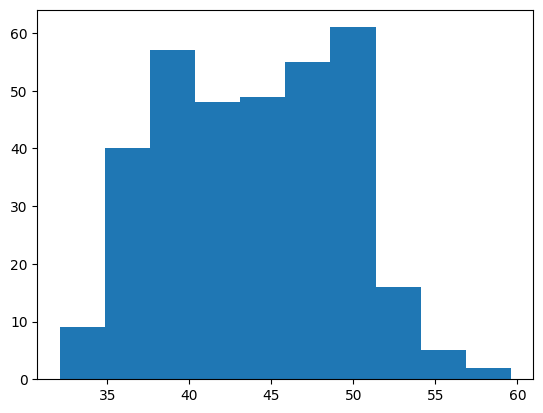

In [31]:
plt.hist(df['culmen_length_mm']) 

<Axes: >

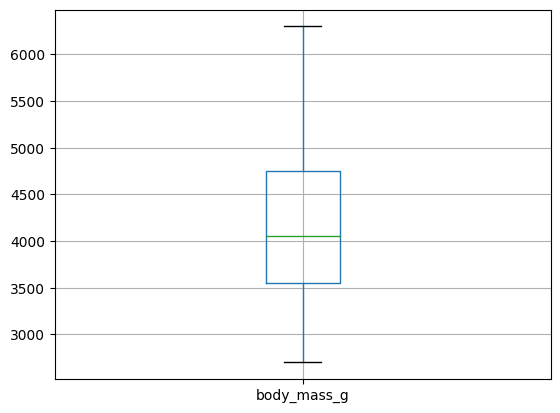

In [32]:
df.boxplot(column="body_mass_g")

BIVARIATE ANALYSIS

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

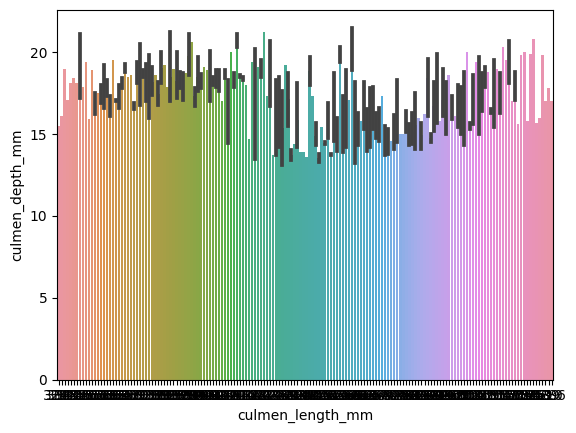

In [33]:
sns.barplot(x="culmen_length_mm",y="culmen_depth_mm",data=df)

<Axes: xlabel='species', ylabel='count'>

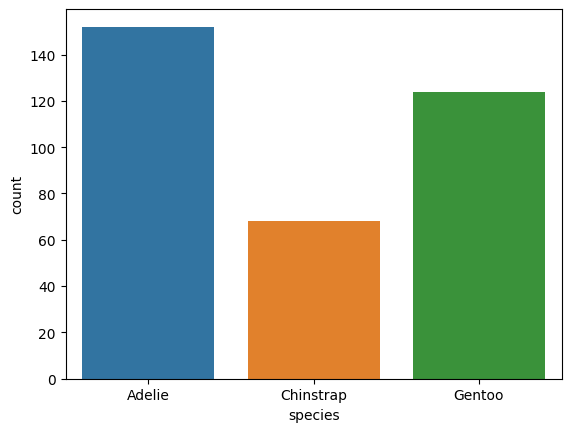

In [34]:
sns.countplot(x="species",data=df)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

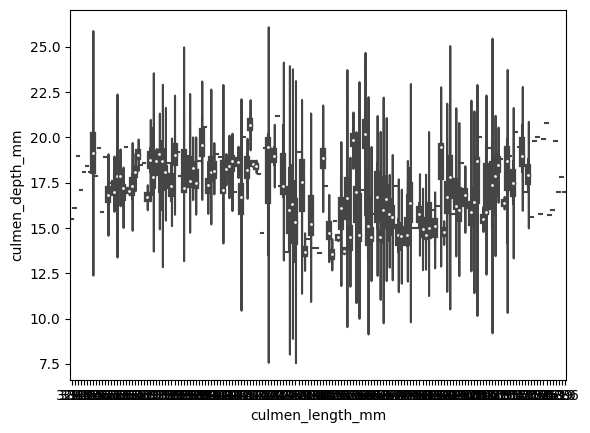

In [35]:
sns.violinplot(x="culmen_length_mm",y="culmen_depth_mm",data=df)

MULTIVARIATE ANALYSIS

<ipython-input-36-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

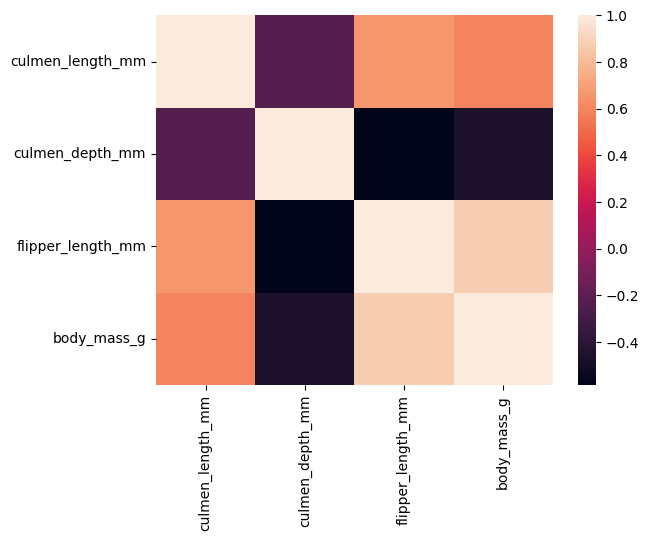

In [36]:
sns.heatmap(df.corr())

DESCRIPTIVE STATISTICS

In [37]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


NULL HANDLING

In [38]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [39]:
df.dropna(inplace=True)
df.dropna(axis=1,inplace=True)

OUTLIERS

In [40]:
import numpy as np
# generate some random data
data = np.random.normal(loc=50, scale=10, size=100)
# define a function to detect and replace outliers using IQR method
def replace_outliers_IQR(data):
    # calculate the quartiles and IQR
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1

    # detect outliers using IQR method
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]

    # replace outliers with the median value
    data[outliers] = np.median(data)

    return data

# call the function and print the results
print("Original data:", data)
data_replaced = replace_outliers_IQR(data)
print("Data with replaced outliers:", data_replaced)

Original data: [68.71193502 40.44990672 39.94843968 32.74904952 51.51050546 51.84100299
 46.88379654 60.04168225 61.19222548 63.97853386 58.71969639 68.72193416
 48.54584971 44.61227287 60.10371121 52.14597136 47.83127313 51.44104297
 44.91794794 36.56767896 42.91111289 56.46578845 59.57556014 32.09264374
 47.5986692  44.50157888 41.41121593 49.91887557 54.50436581 55.59829315
 59.12275848 48.57677657 61.29523573 52.06661882 34.26329499 69.85945553
 51.48272141 56.75351883 55.17698434 60.67504702 42.2829404  53.31773301
 42.24694328 44.42917124 63.10947896 35.24218145 51.5768257  45.21659803
 31.75069685 39.02600517 65.57893587 51.72595814 54.5691676  45.93285532
 64.9018587  34.15914672 33.99180489 45.24991385 57.30177477 48.92176598
 48.3073806  62.77677678 46.13147795 48.15487989 52.37756798 50.77180858
 38.15241534 61.04715232 51.74271662 56.93277052 53.82538876 44.2703424
 50.05854631 72.48292834 39.07832674 38.63392648 56.30248968 61.3013259
 51.87218272 51.77774185 47.62223907 5

In [41]:
#df = df.drop(columns=(["culmen_length_mm"]))

In [42]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


CATEGORIAL COLUMNS AND PERFORM ENCODING

In [43]:
df_categorical =df[['flipper_length_mm','culmen_depth_mm','body_mass_g','culmen_length_mm']]

In [44]:
df_categorical.head()

,flipper_length_mm,culmen_depth_mm,body_mass_g,culmen_length_mm
0,181.0,18.7,3750.0,39.1
1,186.0,17.4,3800.0,39.5
2,195.0,18.0,3250.0,40.3
4,193.0,19.3,3450.0,36.7
5,190.0,20.6,3650.0,39.3


In [45]:
print(df['culmen_depth_mm'].unique())

[18.7 17.4 18.  19.3 20.6 17.8 19.6 17.6 21.2 21.1 19.  20.7 18.4 21.5
 18.3 19.2 18.1 17.2 18.9 18.6 17.9 16.7 17.  20.  18.5 19.1 19.7 16.9
 18.8 17.7 19.5 17.5 16.6 18.2 17.1 16.2 19.4 16.8 16.1 20.3 17.3 16.
 16.5 20.5 19.8 15.9 20.1 15.5 19.9 20.8 16.4 13.2 16.3 14.1 15.2 14.5
 13.5 14.6 15.3 13.4 15.4 13.7 15.7 15.1 14.3 15.8 13.1 15.  14.2 14.8
 13.6 13.9 13.3 14.4 13.8 14.9 15.6 14.  14.7]


In [46]:
print(df['flipper_length_mm'].unique())

[181. 186. 195. 193. 190. 182. 191. 198. 185. 197. 184. 194. 174. 180.
 189. 187. 183. 172. 178. 188. 196. 200. 192. 202. 205. 208. 203. 199.
 176. 210. 201. 212. 206. 207. 211. 230. 218. 215. 219. 209. 214. 216.
 213. 217. 221. 222. 220. 225. 224. 231. 229. 223. 228. 226.]


In [47]:
print(df['body_mass_g'].unique())

[3750. 3800. 3250. 3450. 3650. 3625. 4675. 3200. 4400. 3700. 4500. 3325.
 4200. 3400. 3600. 3950. 3550. 3150. 3900. 3300. 4150. 4650. 3100. 3000.
 4600. 3425. 3500. 4300. 4050. 2900. 2850. 3350. 4100. 3050. 4450. 4250.
 4000. 4700. 4350. 3725. 4725. 3075. 2925. 3175. 4775. 3825. 4275. 4075.
 3775. 3875. 3275. 4475. 3975. 3475. 3525. 3575. 4550. 3850. 4800. 2700.
 3675. 5700. 5400. 5200. 5150. 5550. 5850. 6300. 5350. 5000. 5050. 5100.
 5650. 5250. 6050. 4950. 4750. 4900. 5300. 4850. 5800. 6000. 5950. 4625.
 5450. 5600. 4875. 4925. 4975. 5500. 4575. 4375. 5750.]


In [48]:
# perform one-hot encoding
encoded_df = pd.get_dummies(df)

# print the encoded dataframe
print(encoded_df)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0                 1                  0

In [49]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


ENCODE THE CATEGORICAL VARIABLES

In [50]:
from sklearn.preprocessing import LabelEncoder
el=LabelEncoder()
el2=LabelEncoder()

In [51]:
df['island']=el.fit_transform(df['island'])
df['species']=el.fit_transform(df['species'])
#df['culmen_depth_mm']=el.fit_transform(df['culmen_depth_mm'])
df['sex']=el2.fit_transform(df['sex'])
#df['Torgersen']=el.fit_transform(df['Torgersen'])

In [52]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1


In [53]:
df['island'].unique()

array([2, 0, 1])

SCALING THE DATA

In [64]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(y) 

In [65]:
X_train_minmax 

array([[1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
       [1. ],
      

PERFORM CLUSTERING ALGORITHM

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


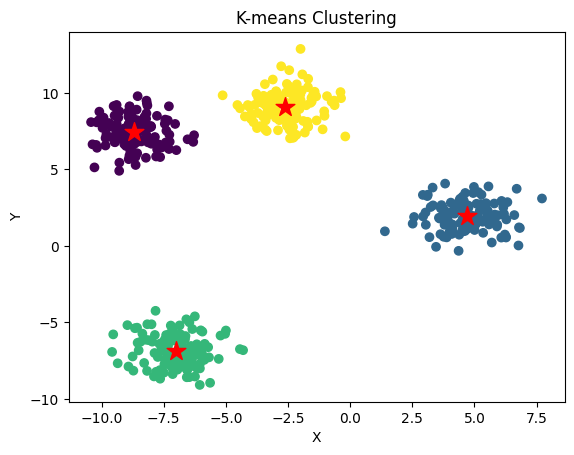

In [55]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
n_samples = 500
n_clusters = 4
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=42)
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='red', s=200)
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

ADD THE CLUSTER DATA WITH THE RIMARY DATA SET

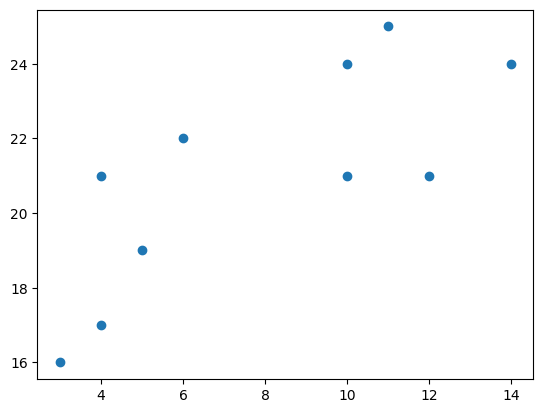

In [56]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

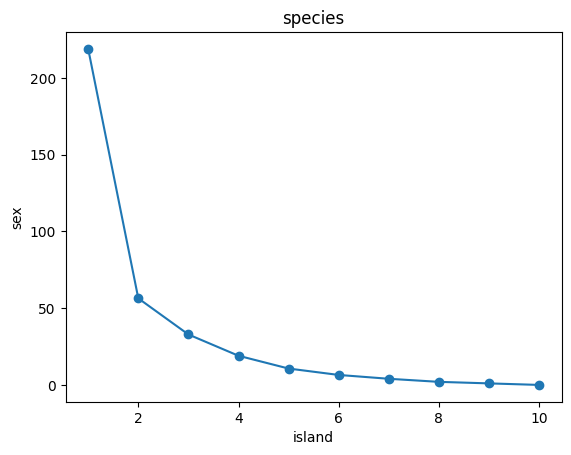

In [57]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('species')
plt.xlabel('island')
plt.ylabel('sex')
plt.show()

SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLE

In [60]:
x=df.iloc[:,1:].values

In [61]:
x

array([[2.00e+00, 3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 2.00e+00],
       [2.00e+00, 3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00],
       [2.00e+00, 4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00],
       ...,
       [0.00e+00, 5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03, 2.00e+00],
       [0.00e+00, 4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03, 1.00e+00],
       [0.00e+00, 4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03, 2.00e+00]])

In [62]:
y=df.iloc[:,1].values.reshape(-1,1)
     

In [63]:
y[:5]

array([[2],
       [2],
       [2],
       [2],
       [2]])

SPLIT THE DATA INTO TRAINING AND TESTING

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [68]:
x_train

array([[1.000e+00, 4.650e+01, 1.790e+01, 1.920e+02, 3.500e+03, 1.000e+00],
       [0.000e+00, 3.970e+01, 1.770e+01, 1.930e+02, 3.200e+03, 1.000e+00],
       [2.000e+00, 4.020e+01, 1.700e+01, 1.760e+02, 3.450e+03, 1.000e+00],
       ...,
       [2.000e+00, 4.140e+01, 1.850e+01, 2.020e+02, 3.875e+03, 2.000e+00],
       [0.000e+00, 4.200e+01, 1.950e+01, 2.000e+02, 4.050e+03, 2.000e+00],
       [1.000e+00, 5.050e+01, 1.840e+01, 2.000e+02, 3.400e+03, 1.000e+00]])

In [69]:
x.shape

(334, 6)

In [70]:
y.shape

(334, 1)

In [71]:
x_train.shape

(267, 6)

In [72]:
x_test.shape

(67, 6)

In [73]:
y_train.shape

(267, 1)

In [74]:
y_test.shape

(67, 1)

In [76]:
x

array([[2.00e+00, 3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 2.00e+00],
       [2.00e+00, 3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00],
       [2.00e+00, 4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00],
       ...,
       [0.00e+00, 5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03, 2.00e+00],
       [0.00e+00, 4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03, 1.00e+00],
       [0.00e+00, 4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03, 2.00e+00]])

In [75]:
y

array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
    

BUILD MODEL

In [78]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=4)

In [79]:
xp=pr.fit_transform(x,y)

In [80]:
x[0]

array([2.00e+00, 3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 2.00e+00])

TRAIN THE MODEL

In [81]:
xp

array([[1.00000e+00, 2.00000e+00, 3.91000e+01, ..., 5.62500e+07,
        3.00000e+04, 1.60000e+01],
       [1.00000e+00, 2.00000e+00, 3.95000e+01, ..., 1.44400e+07,
        3.80000e+03, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.03000e+01, ..., 1.05625e+07,
        3.25000e+03, 1.00000e+00],
       ...,
       [1.00000e+00, 0.00000e+00, 5.04000e+01, ..., 1.32250e+08,
        4.60000e+04, 1.60000e+01],
       [1.00000e+00, 0.00000e+00, 4.52000e+01, ..., 2.70400e+07,
        5.20000e+03, 1.00000e+00],
       [1.00000e+00, 0.00000e+00, 4.99000e+01, ..., 1.16640e+08,
        4.32000e+04, 1.60000e+01]])

TEST THE MODEL

In [82]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()

In [83]:
y1=y_train
y=x_train

In [84]:
mlr.fit(y,y1)

LinearRegression()

In [85]:
ypred=mlr.predict(x_test)
     

In [86]:
ypred

array([[ 1.00000000e+00],
       [ 1.00000000e+00],
       [-1.36076797e-14],
       [ 1.45329836e-14],
       [ 1.00000000e+00],
       [ 1.53050665e-14],
       [ 1.00000000e+00],
       [-1.18527360e-14],
       [ 2.00000000e+00],
       [ 1.92602082e-14],
       [ 6.66761199e-15],
       [ 1.30276740e-15],
       [ 1.00000000e+00],
       [-2.01835156e-14],
       [ 2.00000000e+00],
       [-1.56249432e-14],
       [ 2.00000000e+00],
       [ 7.41470065e-15],
       [ 1.00000000e+00],
       [-8.41546236e-15],
       [ 2.00000000e+00],
       [ 1.00000000e+00],
       [ 7.94709091e-15],
       [ 1.62521028e-14],
       [ 2.49810010e-14],
       [ 5.00702674e-15],
       [ 1.93520824e-14],
       [ 2.29362045e-14],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [-5.52459953e-15],
       [ 1.00000000e+00],
       [ 1.00000000e+00],
       [ 1.92231226e-14],
       [ 2.00000000e+00],
       [-4.83358821e-15],
       [ 2.00000000e+00],
       [ 3.1

In [87]:
y_test

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [2],
       [0],
       [0],
       [0],
       [1],
       [0],
       [2],
       [0],
       [2],
       [0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [2],
       [0],
       [2],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [2],
       [0],
       [2],
       [1],
       [0]])

MEASURE THE PERFORMANCE USING METRICS

In [88]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,ypred)
acc
     

1.0